In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### 1

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания).

In [77]:
data = pd.read_csv('owid-covid-data.csv')

In [78]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [79]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [80]:
data = data[
    (data['iso_code'] == 'RUS') &
    (data['date'] >= '2020-03-03')][['date', 'total_cases', 'new_cases']]

data['new_cases'] = data['new_cases'].replace(0, 1)

In [81]:
data.reset_index(drop=True, inplace=True)

In [82]:
X_train = np.arange(0, 50).reshape(-1, 1)
X_test = np.arange(50, data.shape[0]).reshape(-1, 1)

y_new_train = data.iloc[:50][['new_cases']]
y_new_test = data.iloc[50:][['new_cases']]

y_total_train = data.iloc[:50][['total_cases']]
y_total_test = data.iloc[50:][['total_cases']]

#### 2

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально

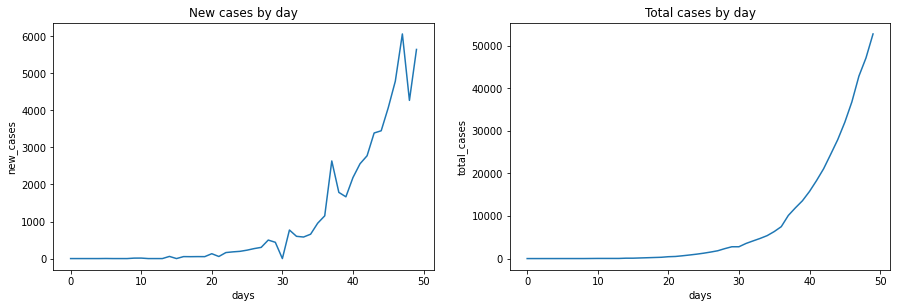

In [83]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(y_new_train)
plt.xlabel('days')
plt.ylabel('new_cases')
plt.title('New cases by day')

plt.subplot(222)
plt.plot(y_total_train)
plt.xlabel('days')
plt.ylabel('total_cases')
plt.title('Total cases by day');

In [84]:
y_new_log_train = np.log(y_new_train)
y_new_log_test = np.log(y_new_test)
y_total_log_train = np.log(y_total_train)
y_total_log_test = np.log(y_total_test)

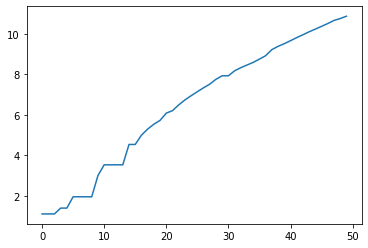

In [85]:
plt.plot(X_train, y_total_log_train)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model_new = LinearRegression()
model_total = LinearRegression()

model_new.fit(X_train, y_new_log_train)
model_total.fit(X_train, y_total_log_train)

LinearRegression()

In [88]:
y_new_pred = model_new.predict(X_test)
y_total_pred = model_total.predict(X_test)

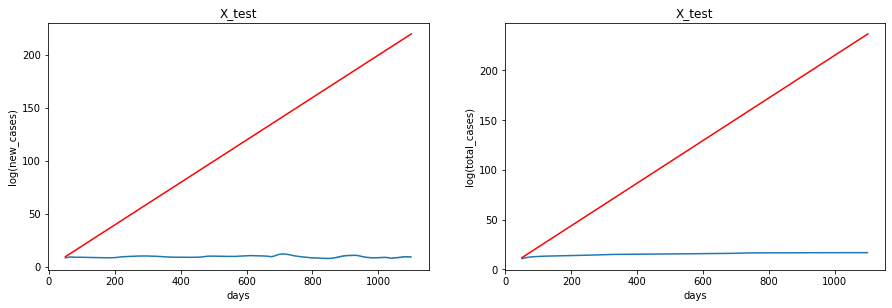

In [89]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(X_test, y_new_log_test)
plt.plot(X_test, y_new_pred, c='r')
plt.xlabel('days')
plt.title("X_test")
plt.ylabel('log(new_cases)')

plt.subplot(222)
plt.plot(X_test, y_total_log_test)
plt.plot(X_test, y_total_pred, c='r')
plt.xlabel('days')
plt.title("X_test")
plt.ylabel('log(total_cases)');

На тестовой выборке очень плохая точность

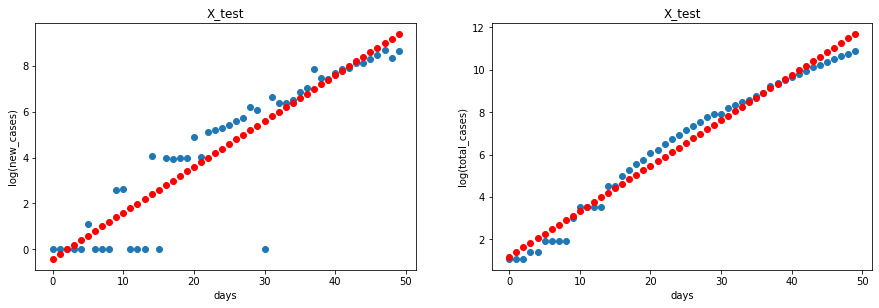

In [90]:
y_new_pred_train = model_new.predict(X_train)
y_total_pred_train = model_total.predict(X_train)

plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.scatter(X_train, y_new_log_train)
plt.scatter(X_train, y_new_pred_train, c='r')
plt.xlabel('days')
plt.title("X_test")
plt.ylabel('log(new_cases)')

plt.subplot(222)
plt.scatter(X_train, y_total_log_train)
plt.scatter(X_train, y_total_pred_train, c='r')
plt.xlabel('days')
plt.title("X_test")
plt.ylabel('log(total_cases)');

In [91]:
print('interception:', model_total.intercept_[0], 'bias:', model_total.coef_[0][0])

interception: 1.1934192756385702 bias: 0.21410636658252818


In [92]:
from sklearn.metrics import mean_squared_error
sigma_0 = 2
model_noise = mean_squared_error(y_total_pred_train, y_total_log_train )
day0 = np.ones_like(X_train)
X = np.hstack([day0, X_train]) 

sigma = np.linalg.inv(np.eye(2) / sigma_0 + (X.T.dot(X)) / model_noise)
mu = sigma.dot(X.T.dot(y_total_log_train) / model_noise)

In [93]:
mu.squeeze()

array([1.18416525, 0.21438625])

In [94]:
from scipy.stats import multivariate_normal

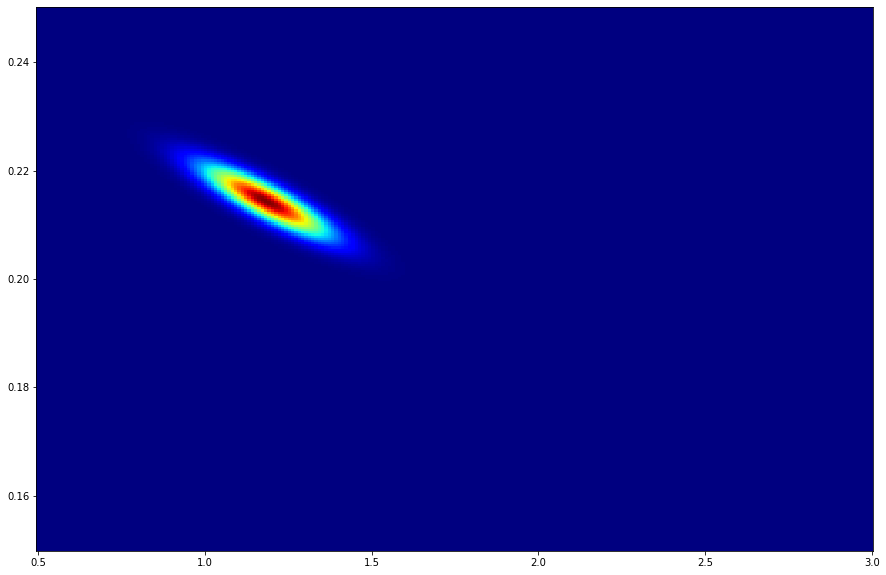

In [95]:
N = 250
X = np.linspace(0.5, 3, N)
Y = np.linspace(0.15, 0.25, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_normal.pdf(pos, mean=mu.squeeze(), cov=sigma)

plt.figure(figsize=(15, 10))
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet, shading='auto');